# 大前提

In [2]:
import cv2
img = cv2.imread('img/Lenna.bmp', 1)

h, w, c = img.shape
print(h, w, c)

256 256 3


## 一般

### グレースケール

In [3]:
dst = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow('gray', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 縮小

In [ ]:

img_resize = cv2.resize(img, (200, 200), cv2.INTER_LINEAR)
cv2.imshow('img5', img_resize)

cv2.waitKey(0)
cv2.destroyAllWindows()

### カメラ

In [4]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

: 

### 引き伸ばし

In [ ]:
# 引き伸ばし
img_resize = cv2.resize(img, (w//2, h*2), cv2.INTER_LINEAR)
cv2.imshow('img1', img_resize)
img_resize = cv2.resize(img, (w*2, h//2), cv2.INTER_NEAREST)
cv2.imshow('img', img_resize)

cv2.waitKey(0)
cv2.destroyAllWindows()

### モザイク

In [3]:
# モザイク
scale = 0.2
dst = cv2.resize(img, (round(w*scale), round(h*scale)))
dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)
cv2.imshow('mosaic', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 画像データの扱い

### グレースケール

In [4]:
import numpy as np

height = 100
width = 200
value = 128

img1 = np.zeros((height, width, 3), np.uint8)
img2 = np.full((height, width, 3), value, np.uint8)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### カラー画像

In [5]:
height = 100
width = 200
channel = 3

value1 = (0, 128, 255)
value2 = (255, 128, 0)

img1 = np.full((height, width, channel), value1, np.uint8)
img2 = np.full((height, width, channel), value2, np.uint8)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### PGM編集

In [18]:
img = cv2.imread('random_image.pgm', 1)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
img[20:400, 30:400] = 0
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### トリミング

In [11]:
img = cv2.imread('img/Lenna.bmp', 1)
h, w, c = img.shape
dist = img[20:h-20, 30:w-30]
cv2.imwrite('dist.png', dist)
cv2.imshow('dist', dist)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 円を書く

In [13]:
cv2.circle(img, (100, 100), 20, (0, 0, 255), -1)
cv2.circle(img, (150, 150), 20, (0, 255, 255), 2)
cv2.circle(img, (100, 100), 20, (0, 0, 255), 6)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 文字を書く

In [14]:
# タイトルいれる
cv2.putText(img, 'Aerial.bmp', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 線

In [16]:
cv2.line(img, (0, 0), (100, 100), (0, 0, 255), 2)
cv2.rectangle(img, (100, 100), (200, 200), (0, 255, 0), 3)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 赤色だけ

In [17]:
red = img.copy()
red[:, :, 0] = 0
red[:, :, 1] = 0
cv2.imshow('red', red)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 濃淡処理

### 折れ線型

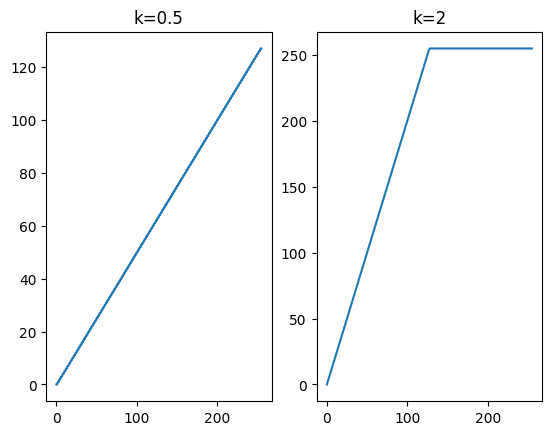

In [2]:
%reset -f

import cv2
import numpy as np
import matplotlib.pyplot as plt

def oresen(k):
    curve = k * np.arange(0,256)
    curve = curve.clip(0,255)
    return curve.astype(np.uint8)

src = cv2.imread('img/Lenna.bmp', 0)
cv2.imshow("src", src)
curve1 = oresen(0.5)
dst = cv2.LUT(src, curve1)
cv2.imshow("dst 0.5", dst)
curve2 = oresen(2)
dst = cv2.LUT(src, curve2)
cv2.imshow("dst 2", dst)

plt.subplot(121)
plt.plot(curve1), plt.title("k=0.5")
plt.subplot(122)
plt.plot(curve2), plt.title("k=2")
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()